# Perilaku Konsumen Operator Telekomunikasi Megaline

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [Kesimpulan](#data_review_conclusions)
    
* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Data File 'calls'](#file_calls)
    * [2.2 Data File 'internet'](#file_internet)
    * [2.3 Data File 'messages'](#file_messages)
    * [2.4 Data File 'plans'](#file_plans)
    * [2.5 Data File 'users'](#file_users)
    * [2.6 Persiapan proses analisis selanjutnya](#prep)
    * [2.6.1 Basis data berdasarkan users](#prep_users)
    * [2.6.2 Penambahan data: calls made monthly](#prep_callspm)
    * [2.6.3 Penambahan data: calls duration monthly](#prep_minutespm)
    * [2.6.4 Penambahan data: internet session monthly](#prep_gbdatapm)
    * [2.6.5 Penambahan data: messages made monthly](#prep_messagespm)
    * [2.6.6 Penghitungan monthly profit](#prep_monthly_profit)
    * [2.6.7 Klasifikasi region](#prep_klas_region)
    * [2.7 Kesimpulan](#data_preprocessing_conclusions)
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Proses analisis perilaku pengguna plan Surf](#analisis_surf)
    * [3.1.1 Analisis Calls Duration Monthly - Surf](#surf_minutespm)
    * [3.1.2 Analisis Internet Session Monthly - Surf](#surf_gbdatapm)
    * [3.1.3 Analisis Messages Made Monthly - Surf](#surf_messagespm)
    * [3.2 Proses analisis perilaku pengguna plan Ultimate](#analisis_ultimate)
    * [3.2.1 Analisis Calls Duration Monthly  - Ultimate](#ultimate_minutespm)
    * [3.2.2 Analisis Internet Session Monthly - Ultimate](#ultimate_gbdatapm)
    * [3.2.3 Analisis Messages Made Monthly - Ultimate](#ultimate_messagespm)
    * [3.3 Kesimpulan](#analysis_conclusion)

* [Tahap 4. Pengujian Hipotesis](#hypothesis_test)
    * [4.1 Uji Hipotesis 1: "Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda"](#test_1)
    * [4.2 Uji Hipotesis 2: "Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain](#test_2)

* [Temuan](#end)

## Pendahuluan <a id='intro'></a>

Peneliti bekerja sebagai analis untuk operator telekomunikasi Megaline. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.
Peneliti akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Peneliti akan memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

### Tujuan: 
Menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan. lebih detailnya adalah mendeskripsikan perilaku konsumen dengan menemukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. 
Menguji hipotesis berikut:
* Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
* Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.


### Tahapan
Data tentang pelanggan dan layanan dari operator telekomunikasi Megaline disimpan dalam *file* sebagai berikut:
- /datasets/megaline_calls.csv
- /datasets/megaline_internet.csv
- /datasets/megaline_messages.csv
- /datasets/megaline_plans.csv
- /datasets/megaline_users.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis, di antaranya:
* Mengkonversi data menjadi tipe data yang dibutuhkan
* Menemukan dan mengeliminasi kesalahan pada data

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Proses Analisis
 4. Uji Hipotesis

 
[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

**Step 1.2**
Melakukan load data yang diperlukan dari file *megaline_calls.csv - megaline_internet - megaline_messages - megaline_plans - megaline_users*

In [2]:
try:
    calls = pd.read_csv('megaline_calls.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')

try:
    internet = pd.read_csv('megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')

try:
    messages = pd.read_csv('megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')

try:
    plans = pd.read_csv('megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')

try:
    users = pd.read_csv('megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')

**Step 1.3**
Memeriksa informasi umum dari dataframe yang di-*load* file *megaline_calls.csv*

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
print(calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


**Step 1.4**
Memeriksa informasi umum dari dataframe yang di-*load* file *megaline_internet.csv*

In [6]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
print(internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


**Step 1.5**
Memeriksa informasi umum dari dataframe yang di-*load* file *megaline_messages.csv*

In [9]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
print(messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


**Step 1.6**
Memeriksa informasi umum dari dataframe yang di-*load* file *megaline_plans.csv*

In [12]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [14]:
print(plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


**Step 1.7**
Memeriksa informasi umum dari dataframe yang di-*load* file *megaline_users.csv*

In [15]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
print(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


### Kesimpulan <a id='data_review_conclusions'></a> 

Setiap baris dalam tiap-tiap tabel menyimpan data terkait user dan layanan operator telekomunikasi Megaline. Berikut rinciannya:

Tabel users (data pengguna):
* user_id — ID pengguna
* first_name — nama depan pengguna
* last_name — nama belakang pengguna
* age — usia pengguna (tahun)
* reg_date — tanggal mulai berlangganan (dd, mm, yy)
* churn_date — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
* city — kota tempat tinggal pengguna
* plan — nama paket telepon

Tabel calls (data panggilan):
* id — ID sesi web unik
* call_date — tanggal panggilan
* duration — durasi panggilan (dalam menit)
* user_id — ID pengguna yang melakukan panggilan

Tabel messages (data SMS):
* id — ID SMS unik
* message_date — tanggal SMS dikirim
* user_id — ID pengguna yang mengirim SMS

Tabel internet (data sesi web):
* id — ID sesi web unik
* mb_used — volume data yang dihabiskan selama sesi (dalam megabita)
* session_date — tanggal sesi web
* user_id — ID pengguna

Tabel plans (data paket telepon):
* plan_name — nama paket telepon
* usd_monthly_fee — biaya bulanan dalam dolar AS
* minutes_included — alokasi menit panggilan bulanan
* messages_included — alokasi SMS bulanan
* mb_per_month_included — alokasi volume data bulanan (dalam megabita)
* usd_per_minute — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
* usd_per_message — harga per SMS jika telah melebihi batas alokasi paket
* usd_per_gb — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)


Terlihat bahwa data yang dimiliki cukup untuk melakukan proses analisis dan uji hipotesis yang diperlukan. Meski demikian, dapat saja ditemukan nilai-nilai yang hilang, tipe-tipe data yang tidak sesuai, data yang perlu diklasifikasi lebih baik, serta beberapa data yang perlu ditambahkan untuk analisis lebih lanjut di antaranya:
1. Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
2. Jumlah SMS yang dikirim per bulan
3. Volume data per bulan
4. Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)

Untuk dapat berlanjut ke proses analisis, perlu dilakukan pra-pemrosesan data terlebih dahulu.

[Kembali ke Daftar Isi](#back)

## Pra-pemrosesan Data <a id='data_preprocessing'></a>

### Data File 'calls' <a id='file_calls'></a>

**Step 2.1**
Melakukan pembulatan ke atas untuk satuan menit terdekat pada kolom duration.

In [18]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         137735 non-null  object
 1   user_id    137735 non-null  int64 
 2   call_date  137735 non-null  object
 3   duration   137735 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 3.7+ MB


**Step 2.2**
Melakukan pemformatan kolom tanggal dengan tipe data yang sesuai.

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


**Step 2.3**
Menambahkan kolom nama bulan yang diperlukan untuk proses analisis selanjutnya.

In [20]:
calls['call_month'] = calls['call_date'].dt.month_name()
calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December


In [21]:
print(len(calls.query('duration == 0')),len(calls))
print(round((len(calls.query('duration == 0'))/len(calls))*100,2), '%')

26834 137735
19.48 %


**Catatan**

Terhadap calls dengan duration 0 dengan porsi sebesar 19,48 % dari keseluruhan data akan tetap dibiarkan dengan asumsi dapat saja terjadi pencatatan calls pada user id users di mana upaya koneksi user ke nomor tujuan tidak tersambung namun tetap tercatat dalam sistem. Kemudian juga pada akhirnya yang dianalisis adalah jumlah kumulatif bulanannya. Dengan porsi 19,48 % dari keseluruhan masih dapat ditolerir. 

### Data File 'internet' <a id='file_internet'></a>

**Step 2.4**
Melakukan pemformatan kolom tanggal dengan tipe data yang sesuai.

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Step 2.5**
Menambahkan kolom nama bulan yang diperlukan untuk proses analisis selanjutnya.

In [23]:
internet['session_month'] = internet['session_date'].dt.month_name()
internet.head()

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


In [24]:
print(len(internet.query('mb_used == 0')),len(internet))
print(round(len(internet.query('mb_used == 0'))/len(internet)*100,2),'%')

13747 104825
13.11 %


**Catatan**

Terhadap internet dengan mb_used 0 dengan porsi sebesar 13,11 % dari keseluruhan data akan tetap dibiarkan dengan asumsi dapat saja terjadi pencatatan internet pada user id users di mana upaya koneksi data ke server provider tidak tersambung namun tetap tercatat dalam sistem. Kemudian juga pada akhirnya yang dianalisis adalah jumlah kumulatif bulanannya. Dengan porsi 13,11 % dari keseluruhan masih dapat ditolerir.

### Data File 'messages' <a id='file_messages'></a>

**Step 2.6**
Melakukan pemformatan kolom tanggal dengan tipe data yang sesuai.

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Step 2.7**
Menambahkan kolom nama bulan yang diperlukan untuk proses analisis selanjutnya.

In [26]:
messages['message_month'] = messages['message_date'].dt.month_name()
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


### Data File 'plans' <a id='file_plans'></a>

**Step 2.8** Mengkonversi satuan data dalam satuan gigabyte. Untuk hal ini diperlukan angka pembagi 1024 sesuai kaidah perhitungan byte.

In [27]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
plans = plans.rename(columns={'mb_per_month_included':'gb_per_month_included'})
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


### Data File 'users' <a id='file_users'></a>

**Step 2.9** Mengkonversi tipe data plan menjadi tipe data category.

In [28]:
users['plan'] = users['plan'].astype('category')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     500 non-null    int64   
 1   first_name  500 non-null    object  
 2   last_name   500 non-null    object  
 3   age         500 non-null    int64   
 4   city        500 non-null    object  
 5   reg_date    500 non-null    object  
 6   plan        500 non-null    category
 7   churn_date  34 non-null     object  
dtypes: category(1), int64(2), object(5)
memory usage: 28.1+ KB


### Persiapan proses analisis selanjutnya <a id='prep'></a>

#### Basis data berdasarkan users <a id='prep_users'></a>

**Step 2.10** Membuat basis tabel data yang mengacu pada data user untuk selanjutnya ditambahkan data bulanan yang relevan untuk proses analisis selanjutnya.

Hal ini mencakup:
•	Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
•	Jumlah SMS yang dikirim per bulan
•	Volume data per bulan
•	Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)


In [29]:
user_stats = users[['user_id', 'first_name', 'last_name', 'city', 'plan']]
user_stats

,user_id,first_name,last_name,city,plan
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...
495,1495,Fidel,Sharpe,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf
496,1496,Ariel,Shepherd,"New Orleans-Metairie, LA MSA",surf
497,1497,Donte,Barrera,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate
498,1498,Scot,Williamson,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf


#### Pembuatan data: calls made month <a id='prep_callspm'></a>

**Step 2.11** Membuat data calls made month per pengguna dan mengikhtisarkan data calls made untuk ditambahkan ke tabel user_stats.

In [30]:
calls_made_month = calls.groupby(['user_id','call_month']).count()
calls_made_month

id  call_date  duration
user_id call_month                         
1000    December    16         16        16
1001    August      27         27        27
        December    56         56        56
        November    64         64        64
        October     65         65        65
...                 ..        ...       ...
1498    September   45         45        45
1499    December    65         65        65
        November    45         45        45
        October     53         53        53
        September   41         41        41

[2258 rows x 3 columns]

In [31]:
calls_made = calls.groupby(['user_id']).count()
calls_made = calls_made['id'].astype('int')
calls_made = calls_made.to_frame(name='calls_made')
calls_made

,calls_made
user_id,
1000,16
1001,261
1002,113
1003,149
1004,370
...,...
1495,253
1496,195
1497,54


#### Penambahan data: calls duration month <a id='prep_minutespm'></a>

**Step 2.12** Membuat data calls duration month per pengguna dan mengikhtisarkan data calls duration untuk ditambahkan ke tabel user_stats.

In [32]:
calls_duration_month = calls.groupby(['user_id','call_month']).sum(['duration'])
calls_duration_month

duration
user_id call_month          
1000    December         124
1001    August           182
        December         412
        November         426
        October          393
...                      ...
1498    September        363
1499    December         496
        November         308
        October          385
        September        346

[2258 rows x 1 columns]

In [33]:
calls_duration = calls_duration_month.groupby(['user_id']).sum()
calls_duration

,duration
user_id,
1000,124
1001,1728
1002,829
1003,1104
1004,2772
...,...
1495,1765
1496,1455
1497,300


#### Penambahan data: internet session month <a id='prep_gbdatapm'></a>

**Step 2.13** Membuat data internet session month per pengguna dan mengikhtisarkan data internet session untuk ditambahkan ke tabel user_stats. Sebagai catatan tambahan, dalam proses ini sekaligus mengkonversi data internet session month ke dalam satuan gigabyte. Untuk hal ini diperlukan angka pembagi 1024 sesuai kaidah perhitungan byte.

In [34]:
internet_session_month = internet.groupby(['user_id','session_month']).sum(['mb_used'])
internet_session_month['mb_used'] = internet_session_month['mb_used']/1024
internet_session_month['mb_used'] = internet_session_month['mb_used'].apply(np.ceil).astype('int')
internet_session_month = internet_session_month.rename(columns={'mb_used': 'gb_used'})
internet_session_month

gb_used
user_id session_month         
1000    December             2
1001    August               7
        December            19
        November            19
        October             22
...                        ...
1498    September           23
1499    December            22
        November            17
        October             20
        September           13

[2277 rows x 1 columns]

In [35]:
internet_session = internet_session_month.groupby(['user_id']).sum()
internet_session

,gb_used
user_id,
1000,2
1001,81
1002,41
1003,27
1004,157
...,...
1495,99
1496,66
1497,11


#### Penambahan data: messages made month <a id='prep_messagespm'></a>

**Step 2.14** Membuat data messages made month per pengguna dan mengikhtisarkan data message made untuk ditambahkan ke tabel user_stats.

In [36]:
messages_made_month = messages.groupby(['user_id','message_month']).count()
messages_made_month

id  message_date
user_id message_month                  
1000    December       11            11
1001    August         30            30
        December       44            44
        November       36            36
        October        53            53
...                    ..           ...
1496    December       11            11
        November       13            13
        October        18            18
        September      21            21
1497    December       50            50

[1806 rows x 2 columns]

In [37]:
messages_made = messages.groupby(['user_id']).count()
messages_made = messages_made['id'].astype('int')
messages_made = messages_made.to_frame(name='messages_made')
messages_made

,messages_made
user_id,
1000,11
1001,207
1002,88
1003,50
1004,177
...,...
1491,409
1492,108
1494,174


In [38]:
calls_made_January = calls_made_month.query('call_month == "January"')
calls_made_Jan = calls_made_January['id'].astype('int').to_frame(name='calls_made')
calls_made_February = calls_made_month.query('call_month == "February"')
calls_made_Feb = calls_made_February['id'].astype('int').to_frame(name='calls_made')
calls_made_March = calls_made_month.query('call_month == "March"')
calls_made_Mar = calls_made_March['id'].astype('int').to_frame(name='calls_made')
calls_made_April = calls_made_month.query('call_month == "April"')
calls_made_Apr = calls_made_April['id'].astype('int').to_frame(name='calls_made')
calls_made_May = calls_made_month.query('call_month == "May"')
calls_made_May = calls_made_May['id'].astype('int').to_frame(name='calls_made')
calls_made_June = calls_made_month.query('call_month == "June"')
calls_made_Jun = calls_made_June['id'].astype('int').to_frame(name='calls_made')
calls_made_July = calls_made_month.query('call_month == "July"')
calls_made_Jul = calls_made_July['id'].astype('int').to_frame(name='calls_made')
calls_made_August = calls_made_month.query('call_month == "August"')
calls_made_Aug = calls_made_August['id'].astype('int').to_frame(name='calls_made')
calls_made_September = calls_made_month.query('call_month == "September"')
calls_made_Sep = calls_made_September['id'].astype('int').to_frame(name='calls_made')
calls_made_October = calls_made_month.query('call_month == "October"')
calls_made_Oct = calls_made_October['id'].astype('int').to_frame(name='calls_made')
calls_made_November = calls_made_month.query('call_month == "November"')
calls_made_Nov = calls_made_November['id'].astype('int').to_frame(name='calls_made')
calls_made_December = calls_made_month.query('call_month == "December"')
calls_made_Dec = calls_made_December['id'].astype('int').to_frame(name='calls_made')

#calls_made_Jan
#calls_made_Feb
#calls_made_Mar
#calls_made_Apr
#calls_made_May
#calls_made_Jun
#calls_made_Jul
#calls_made_Aug
#calls_made_Sep
#calls_made_Oct
#calls_made_Nov
calls_made_Dec

,,calls_made
user_id,call_month,
1000,December,16
1001,December,56
1002,December,47
1003,December,149
1004,December,50
...,...,...
1495,December,65
1496,December,40
1497,December,54


In [39]:
calls_duration_Jan = calls_duration_month.query('call_month == "January"')
calls_duration_Feb = calls_duration_month.query('call_month == "February"')
calls_duration_Mar = calls_duration_month.query('call_month == "March"')
calls_duration_Apr = calls_duration_month.query('call_month == "April"')
calls_duration_May = calls_duration_month.query('call_month == "May"')
calls_duration_Jun = calls_duration_month.query('call_month == "June"')
calls_duration_Jul = calls_duration_month.query('call_month == "July"')
calls_duration_Aug = calls_duration_month.query('call_month == "August"')
calls_duration_Sep = calls_duration_month.query('call_month == "September"')
calls_duration_Oct = calls_duration_month.query('call_month == "October"')
calls_duration_Nov = calls_duration_month.query('call_month == "November"')
calls_duration_Dec = calls_duration_month.query('call_month == "December"')

#calls_duration_Jan
#calls_duration_Feb
#calls_duration_Mar
#calls_duration_Apr
#calls_duration_May
#calls_duration_Jun
#calls_duration_Jul
#calls_duration_Aug
#calls_duration_Sep
#calls_duration_Oct
#calls_duration_Nov
calls_duration_Dec

,,duration
user_id,call_month,
1000,December,124
1001,December,412
1002,December,384
1003,December,1104
1004,December,427
...,...,...
1495,December,492
1496,December,294
1497,December,300


In [40]:
internet_session_Jan = internet_session_month.query('session_month == "January"')
internet_session_Feb = internet_session_month.query('session_month == "February"')
internet_session_Mar = internet_session_month.query('session_month == "March"')
internet_session_Apr = internet_session_month.query('session_month == "April"')
internet_session_May = internet_session_month.query('session_month == "May"')
internet_session_Jun = internet_session_month.query('session_month == "June"')
internet_session_Jul = internet_session_month.query('session_month == "July"')
internet_session_Aug = internet_session_month.query('session_month == "August"')
internet_session_Sep = internet_session_month.query('session_month == "September"')
internet_session_Oct = internet_session_month.query('session_month == "October"')
internet_session_Nov = internet_session_month.query('session_month == "November"')
internet_session_Dec = internet_session_month.query('session_month == "December"')

#internet_session_Jan
#internet_session_Feb
#internet_session_Mar
#internet_session_Apr
#internet_session_May
#internet_session_Jun
#internet_session_Jul
#internet_session_Aug
#internet_session_Sep
#internet_session_Oct
#internet_session_Nov
internet_session_Dec

,,gb_used
user_id,session_month,
1000,December,2
1001,December,19
1002,December,15
1003,December,27
1004,December,21
...,...,...
1495,December,24
1496,December,17
1497,December,11


In [41]:
messages_made_January = messages_made_month.query('message_month == "January"')
messages_made_Jan = messages_made_January['id'].astype('int').to_frame(name='messages_made')
messages_made_February = messages_made_month.query('message_month == "February"')
messages_made_Feb = messages_made_February['id'].astype('int').to_frame(name='messages_made')
messages_made_March = messages_made_month.query('message_month == "March"')
messages_made_Mar = messages_made_March['id'].astype('int').to_frame(name='messages_made')
messages_made_April = messages_made_month.query('message_month == "April"')
messages_made_Apr = messages_made_April['id'].astype('int').to_frame(name='messages_made')
messages_made_May = messages_made_month.query('message_month == "May"')
messages_made_May = messages_made_May['id'].astype('int').to_frame(name='messages_made')
messages_made_June = messages_made_month.query('message_month == "June"')
messages_made_Jun = messages_made_June['id'].astype('int').to_frame(name='messages_made')
messages_made_July = messages_made_month.query('message_month == "July"')
messages_made_Jul = messages_made_July['id'].astype('int').to_frame(name='messages_made')
messages_made_August = messages_made_month.query('message_month == "August"')
messages_made_Aug = messages_made_August['id'].astype('int').to_frame(name='messages_made')
messages_made_September = messages_made_month.query('message_month == "September"')
messages_made_Sep = messages_made_September['id'].astype('int').to_frame(name='messages_made')
messages_made_October = messages_made_month.query('message_month == "October"')
messages_made_Oct = messages_made_October['id'].astype('int').to_frame(name='messages_made')
messages_made_November = messages_made_month.query('message_month == "November"')
messages_made_Nov = messages_made_November['id'].astype('int').to_frame(name='messages_made')
messages_made_December = messages_made_month.query('message_month == "December"')
messages_made_Dec = messages_made_December['id'].astype('int').to_frame(name='messages_made')

#messages_made_Jan
#messages_made_Feb
#messages_made_Mar
#messages_made_Apr
#messages_made_May
#messages_made_Jun
#messages_made_Jul
#messages_made_Aug
#messages_made_Sep
#messages_made_Oct
#messages_made_Nov
messages_made_Dec

,,messages_made
user_id,message_month,
1000,December,11
1001,December,44
1002,December,41
1003,December,50
1004,December,31
...,...,...
1491,December,43
1492,December,37
1494,December,33


#### Penghitungan profit <a id='prep_monthly_profit'></a>

In [42]:
def monthly_profit(row):
    minutes_count = 0
    messages_count = 0
    gb_count = 0
    plan = row['plan'] 

    if plan == 'surf':
        if row['duration'] > 500: 
            minutes_count = row['duration'] - 500
        if row['messages_made'] > 50:
            messages_count = row['messages_made'] - 50
        if row['gb_used'] > 15:
            gb_count = row['gb_used'] - 15
        profit = (minutes_count * .03) + (messages_count * .03) + (gb_count * 10)
        
    if plan == 'ultimate':
        if row['duration'] > 3000:
            minutes_count = row['duration'] - 3000
        if row['messages_made'] > 1000:
            messages_count = row['messages_made'] - 1000
        if row['gb_used'] > 30:
            gb_count = row['gb_used'] - 30
        profit = (minutes_count * .01) + (messages_count * .01) + (gb_count * 7)
        
    return profit

**Step 2.15** Menghitung monthly profit per pengguna sesuai dengan plan yang digunakan untuk ditambahkan ke tabel user_stats, dengan rincian berikut:

**Surf**
1.	Biaya bulanan: 20
2.	500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
3.	Setelah melebihi batas paket, akan dikenakan:
    - 1 menit: 3 sen
    - 1 SMS: 3 sen
    - 1 GB data: 10

**Ultimate**
1.	Biaya bulanan: 70
2.	3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
3.	Setelah melebihi batas paket, akan dikenakan:
    - 1 menit: 1 sen
    - 1 SMS: 1 sen
    - 1 GB data: 7

Hal ini nantinya ditujukan untuk menguji hipotesis apakah rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

In [43]:
user_stats_Jan = user_stats.merge(calls_made_Jan,how ='outer',on='user_id').merge(calls_duration_Jan,how ='left',on='user_id').merge(internet_session_Jan,how ='left',on='user_id').merge(messages_made_Jan,how ='left',on='user_id')
user_stats_Jan[['calls_made','duration','gb_used','messages_made']] = user_stats_Jan[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Jan['profit'] = user_stats_Jan.apply(monthly_profit, axis=1)
user_stats_Feb = user_stats.merge(calls_made_Feb,how ='outer',on='user_id').merge(calls_duration_Feb,how ='left',on='user_id').merge(internet_session_Feb,how ='left',on='user_id').merge(messages_made_Feb,how ='left',on='user_id')
user_stats_Feb[['calls_made','duration','gb_used','messages_made']] = user_stats_Feb[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Feb['profit'] = user_stats_Feb.apply(monthly_profit, axis=1)
user_stats_Mar = user_stats.merge(calls_made_Mar,how ='outer',on='user_id').merge(calls_duration_Mar,how ='left',on='user_id').merge(internet_session_Mar,how ='left',on='user_id').merge(messages_made_Mar,how ='left',on='user_id')
user_stats_Mar[['calls_made','duration','gb_used','messages_made']] = user_stats_Mar[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Mar['profit'] = user_stats_Mar.apply(monthly_profit, axis=1)
user_stats_Apr = user_stats.merge(calls_made_Apr,how ='outer',on='user_id').merge(calls_duration_Apr,how ='left',on='user_id').merge(internet_session_Apr,how ='left',on='user_id').merge(messages_made_Apr,how ='left',on='user_id')
user_stats_Apr[['calls_made','duration','gb_used','messages_made']] = user_stats_Apr[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Apr['profit'] = user_stats_Apr.apply(monthly_profit, axis=1)
user_stats_May = user_stats.merge(calls_made_May,how ='outer',on='user_id').merge(calls_duration_May,how ='left',on='user_id').merge(internet_session_May,how ='left',on='user_id').merge(messages_made_May,how ='left',on='user_id')
user_stats_May[['calls_made','duration','gb_used','messages_made']] = user_stats_May[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_May['profit'] = user_stats_May.apply(monthly_profit, axis=1)
user_stats_Jun = user_stats.merge(calls_made_Jun,how ='outer',on='user_id').merge(calls_duration_Jun,how ='left',on='user_id').merge(internet_session_Jun,how ='left',on='user_id').merge(messages_made_Jun,how ='left',on='user_id')
user_stats_Jun[['calls_made','duration','gb_used','messages_made']] = user_stats_Jun[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Jun['profit'] = user_stats_Jun.apply(monthly_profit, axis=1)
user_stats_Jul = user_stats.merge(calls_made_Jul,how ='outer',on='user_id').merge(calls_duration_Jul,how ='left',on='user_id').merge(internet_session_Jul,how ='left',on='user_id').merge(messages_made_Jul,how ='left',on='user_id')
user_stats_Jul[['calls_made','duration','gb_used','messages_made']] = user_stats_Jul[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Jul['profit'] = user_stats_Jul.apply(monthly_profit, axis=1)
user_stats_Aug = user_stats.merge(calls_made_Aug,how ='outer',on='user_id').merge(calls_duration_Aug,how ='left',on='user_id').merge(internet_session_Aug,how ='left',on='user_id').merge(messages_made_Aug,how ='left',on='user_id')
user_stats_Aug[['calls_made','duration','gb_used','messages_made']] = user_stats_Aug[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Aug['profit'] = user_stats_Aug.apply(monthly_profit, axis=1)
user_stats_Sep = user_stats.merge(calls_made_Sep,how ='outer',on='user_id').merge(calls_duration_Sep,how ='left',on='user_id').merge(internet_session_Sep,how ='left',on='user_id').merge(messages_made_Sep,how ='left',on='user_id')
user_stats_Sep[['calls_made','duration','gb_used','messages_made']] = user_stats_Sep[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Sep['profit'] = user_stats_Sep.apply(monthly_profit, axis=1)
user_stats_Oct = user_stats.merge(calls_made_Oct,how ='outer',on='user_id').merge(calls_duration_Oct,how ='left',on='user_id').merge(internet_session_Oct,how ='left',on='user_id').merge(messages_made_Oct,how ='left',on='user_id')
user_stats_Oct[['calls_made','duration','gb_used','messages_made']] = user_stats_Oct[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Oct['profit'] = user_stats_Oct.apply(monthly_profit, axis=1)
user_stats_Nov = user_stats.merge(calls_made_Nov,how ='outer',on='user_id').merge(calls_duration_Nov,how ='left',on='user_id').merge(internet_session_Nov,how ='left',on='user_id').merge(messages_made_Nov,how ='left',on='user_id')
user_stats_Nov[['calls_made','duration','gb_used','messages_made']] = user_stats_Nov[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Nov['profit'] = user_stats_Nov.apply(monthly_profit, axis=1)
user_stats_Dec = user_stats.merge(calls_made_Dec,how ='outer',on='user_id').merge(calls_duration_Dec,how ='left',on='user_id').merge(internet_session_Dec,how ='left',on='user_id').merge(messages_made_Dec,how ='left',on='user_id')
user_stats_Dec[['calls_made','duration','gb_used','messages_made']] = user_stats_Dec[['calls_made','duration','gb_used','messages_made']].fillna(0)
user_stats_Dec['profit'] = user_stats_Dec.apply(monthly_profit, axis=1)

profit_Jan = user_stats_Jan[['user_id','profit']]
profit_Feb = user_stats_Feb[['user_id','profit']]
profit_Mar = user_stats_Mar[['user_id','profit']]
profit_Apr = user_stats_Apr[['user_id','profit']]
profit_May = user_stats_May[['user_id','profit']]
profit_Jun = user_stats_Jun[['user_id','profit']]
profit_Jul = user_stats_Jul[['user_id','profit']]
profit_Aug = user_stats_Aug[['user_id','profit']]
profit_Sep = user_stats_Sep[['user_id','profit']]
profit_Oct = user_stats_Oct[['user_id','profit']]
profit_Nov = user_stats_Nov[['user_id','profit']]
profit_Dec = user_stats_Dec[['user_id','profit']]
profit_Dec

,user_id,profit
0,1000,0.00
1,1001,40.00
2,1002,0.00
3,1003,138.12
4,1004,60.00
...,...,...
495,1495,90.00
496,1496,20.00
497,1497,0.00
498,1498,80.00


In [44]:
calls_made_list = [calls_made_Jan,calls_made_Feb,calls_made_Mar,calls_made_Apr,calls_made_May,calls_made_Jun,calls_made_Jul,calls_made_Aug,calls_made_Sep,calls_made_Oct,calls_made_Nov,calls_made_Dec]
calls_made_conc = pd.concat(calls_made_list)

calls_made_sum = calls_made_conc.groupby('user_id')['calls_made'].sum().reset_index()
calls_made_sum.rename(columns={'calls_made':'calls_made_year_sum'}, inplace=True)

calls_made_mean = calls_made_conc.groupby('user_id')['calls_made'].mean().round().reset_index()
calls_made_mean.rename(columns={'calls_made':'calls_made_year_mean'}, inplace=True)

In [45]:
calls_duration_list = [calls_duration_Jan,calls_duration_Feb,calls_duration_Mar,calls_duration_Apr,calls_duration_May,calls_duration_Jun,calls_duration_Jul,calls_duration_Aug,calls_duration_Sep,calls_duration_Oct,calls_duration_Nov,calls_duration_Dec]
calls_duration_conc = pd.concat(calls_duration_list)

calls_duration_sum = calls_duration_conc.groupby('user_id')['duration'].sum().reset_index()
calls_duration_sum.rename(columns={'duration':'duration_year_sum'}, inplace=True)

calls_duration_mean = calls_duration_conc.groupby('user_id')['duration'].mean().round().reset_index()
calls_duration_mean.rename(columns={'duration':'duration_year_mean'}, inplace=True)

In [46]:
internet_session_list = [internet_session_Jan,internet_session_Feb,internet_session_Mar,internet_session_Apr,internet_session_May,internet_session_Jun,internet_session_Jul,internet_session_Aug,internet_session_Sep,internet_session_Oct,internet_session_Nov,internet_session_Dec]
internet_session_conc = pd.concat(internet_session_list)

internet_session_sum = internet_session_conc.groupby('user_id')['gb_used'].sum().reset_index()
internet_session_sum.rename(columns={'gb_used':'gb_used_year_sum'}, inplace=True)

internet_session_mean = internet_session_conc.groupby('user_id')['gb_used'].mean().round().reset_index()
internet_session_mean.rename(columns={'gb_used':'gb_used_year_mean'}, inplace=True)

In [47]:
messages_made_list = [messages_made_Jan,messages_made_Feb,messages_made_Mar,messages_made_Apr,messages_made_May,messages_made_Jun,messages_made_Jul,messages_made_Aug,messages_made_Sep,messages_made_Oct,messages_made_Nov,messages_made_Dec]
messages_made_conc = pd.concat(messages_made_list)

messages_made_sum = messages_made_conc.groupby('user_id')['messages_made'].sum().reset_index()
messages_made_sum.rename(columns={'messages_made':'messages_made_year_sum'}, inplace=True)

messages_made_mean = messages_made_conc.groupby('user_id')['messages_made'].mean().round().reset_index()
messages_made_mean.rename(columns={'messages_made':'messages_made_year_mean'}, inplace=True)

In [48]:
profit_list = [profit_Jan,profit_Feb,profit_Mar,profit_Apr,profit_May,profit_Jun,profit_Jul,profit_Aug,profit_Sep,profit_Oct,profit_Nov,profit_Dec]
profit_conc = pd.concat(profit_list)

profit_sum = profit_conc.groupby('user_id')['profit'].sum().reset_index()
profit_sum.rename(columns={'profit':'profit_year_sum'}, inplace=True)

profit_mean = profit_conc.groupby('user_id')['profit'].mean().round().reset_index()
profit_mean.rename(columns={'profit':'profit_year_mean'}, inplace=True)

In [49]:
user_stats_year = user_stats.merge(calls_made_sum,how ='outer',on='user_id').merge(calls_made_mean,how ='outer',on='user_id').merge(calls_duration_sum,how ='outer',on='user_id').merge(calls_duration_mean,how ='outer',on='user_id').merge(internet_session_sum,how ='outer',on='user_id').merge(internet_session_mean,how ='outer',on='user_id').merge(messages_made_sum,how ='outer',on='user_id').merge(messages_made_mean,how ='outer',on='user_id').merge(profit_sum,how ='outer',on='user_id').merge(profit_mean,how ='outer',on='user_id')
user_stats_year[['calls_made_year_sum','calls_made_year_mean','duration_year_sum','duration_year_mean','gb_used_year_sum','gb_used_year_mean','messages_made_year_sum','messages_made_year_mean','profit_year_sum','profit_year_mean']] = user_stats_year[['calls_made_year_sum','calls_made_year_mean','duration_year_sum','duration_year_mean','gb_used_year_sum','gb_used_year_mean','messages_made_year_sum','messages_made_year_mean','profit_year_sum','profit_year_mean']].fillna(0)
user_stats_year

,user_id,first_name,last_name,city,plan,calls_made_year_sum,calls_made_year_mean,duration_year_sum,duration_year_mean,gb_used_year_sum,gb_used_year_mean,messages_made_year_sum,messages_made_year_mean,profit_year_sum,profit_year_mean
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.0,16.0,124.0,124.0,2.0,2.0,11.0,11.0,0.00,0.0
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,261.0,52.0,1728.0,346.0,81.0,16.0,207.0,41.0,150.09,13.0
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf,113.0,38.0,829.0,276.0,41.0,14.0,88.0,29.0,40.00,3.0
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf,149.0,149.0,1104.0,1104.0,27.0,27.0,50.0,50.0,138.12,12.0
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf,370.0,46.0,2772.0,346.0,157.0,20.0,177.0,22.0,450.00,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,253.0,63.0,1765.0,441.0,99.0,25.0,0.0,0.0,393.30,33.0
496,1496,Ariel,Shepherd,"New Orleans-Metairie, LA MSA",surf,195.0,39.0,1455.0,291.0,66.0,13.0,65.0,13.0,40.00,3.0
497,1497,Donte,Barrera,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,54.0,54.0,300.0,300.0,11.0,11.0,50.0,50.0,0.00,0.0
498,1498,Scot,Williamson,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,451.0,41.0,3211.0,292.0,228.0,21.0,0.0,0.0,630.00,52.0


#### Klasifikasi region <a id='prep_klas_region'></a>

**Step 2.16** Mengklasifikan region untuk khusus NY-NJ dan di luar NY-NJ.

Klasifikasi region yang dilakukan adalah dengan memisahkan region NY-NJ dengan lainnya, dilakukan dengan memanfaatkan data yang terdapat dalam kolom city.

Hal ini nantinya ditujukan untuk menguji hpotesis apakah rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

In [50]:
user_stats_year['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [51]:
def region(city):
    words_split = city.split(",")
    for entry in words_split:
        if ('NY-NJ' in entry)|(entry == 'NY')|(entry == 'NJ'):
            return 'ny-nj'
        
user_stats_year['region'] = user_stats_year['city'].apply(region)
user_stats_year['region'] = user_stats_year['region'].fillna('other')
user_stats_year['region'] = user_stats_year['region'].astype('category')
user_stats_year['region'].value_counts()

region
other    420
ny-nj     80
Name: count, dtype: int64

In [52]:
user_stats_year.head()

,user_id,first_name,last_name,city,plan,calls_made_year_sum,calls_made_year_mean,duration_year_sum,duration_year_mean,gb_used_year_sum,gb_used_year_mean,messages_made_year_sum,messages_made_year_mean,profit_year_sum,profit_year_mean,region
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.0,16.0,124.0,124.0,2.0,2.0,11.0,11.0,0.00,0.0,other
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,261.0,52.0,1728.0,346.0,81.0,16.0,207.0,41.0,150.09,13.0,other
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf,113.0,38.0,829.0,276.0,41.0,14.0,88.0,29.0,40.00,3.0,other
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf,149.0,149.0,1104.0,1104.0,27.0,27.0,50.0,50.0,138.12,12.0,other
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf,370.0,46.0,2772.0,346.0,157.0,20.0,177.0,22.0,450.00,38.0,other


### Kesimpulan <a id='data_preprocessing_conclusions'></a> 

* Konversi kolom yang diperlukan untuk proses analisis selanjutnya telah dilakukan.
* Tabel data user yang melingkupi summary penggunaan layanan berikut monthly profit dan region yang diperlukan untuk proses analisis selanjutnya juga telah dilakukan.
* Kelengkapan data untuk pengujian hipotesis pun telah dipenuhi.

[Kembali ke Daftar Isi](#back)

## Analisis <a name='analysis'></a>

Melakukan proses analisis calls, messages, dan gb_data dari pengguna untuk masing-masing plan secara bulanan.

### Proses analisis perilaku pengguna plan Surf <a id='analisis_surf'></a>

**Step 3.1** 
Melakukan proses analisis calls, messages, dan gb_data dari pengguna plan **Surf** secara bulanan.

In [53]:
surf_part = user_stats_year.query('plan == "surf"')
surf_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 1 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   user_id                  339 non-null    int64   
 1   first_name               339 non-null    object  
 2   last_name                339 non-null    object  
 3   city                     339 non-null    object  
 4   plan                     339 non-null    category
 5   calls_made_year_sum      339 non-null    float64 
 6   calls_made_year_mean     339 non-null    float64 
 7   duration_year_sum        339 non-null    float64 
 8   duration_year_mean       339 non-null    float64 
 9   gb_used_year_sum         339 non-null    float64 
 10  gb_used_year_mean        339 non-null    float64 
 11  messages_made_year_sum   339 non-null    float64 
 12  messages_made_year_mean  339 non-null    float64 
 13  profit_year_sum          339 non-null    float64 
 14  profit_year_mea

#### Analisis Calls Duration Monthly - Surf <a id='surf_minutespm'></a>

**Step 3.2** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Surf** berdasarkan data 'duration'.

Menyiapkan nilai varian.

In [54]:
np.var(surf_part['duration_year_mean'])

41820.90209796289

Menyiapkan nilai rata-rata dan standar deviasi.

In [55]:
surf_part['duration_year_mean'].describe()

count     339.000000
mean      401.643068
std       204.803888
min         0.000000
25%       285.500000
50%       391.000000
75%       533.000000
max      1104.000000
Name: duration_year_mean, dtype: float64

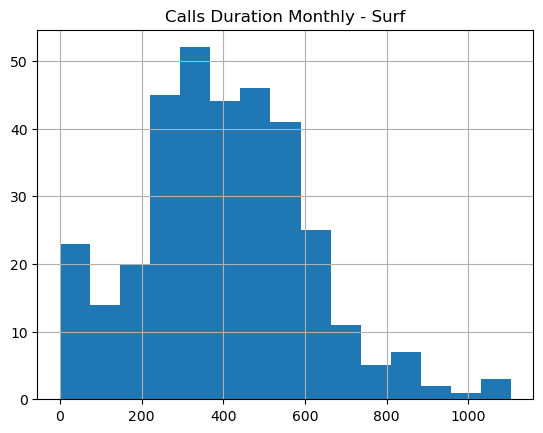

In [56]:
surf_part['duration_year_mean'].hist(bins=15)
plt.title('Calls Duration Monthly - Surf')
plt.show()

Sebagian besar pengguna plan Surf melakukan call antara 200 dan 650 per bulan, dengan puncaknya di kisaran 350. 
Rata-ratanya lebih besar dari  median oleh karenanya histogram ini memiliki kemiringan ke kanan (positive skew).

#### Analisis Internet Session Monthly - Surf <a id='surf_gbdatapm'></a>

**Step 3.3** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Surf** berdasarkan data 'gb_used'.

Menyiapkan nilai varian.

In [57]:
np.var(surf_part['gb_used_year_mean'])

40.73638412474652

Menyiapkan nilai rata-rata dan standar deviasi.

In [58]:
surf_part['gb_used_year_mean'].describe()

count    339.000000
mean      15.737463
std        6.391941
min        0.000000
25%       12.000000
50%       16.000000
75%       19.000000
max       44.000000
Name: gb_used_year_mean, dtype: float64

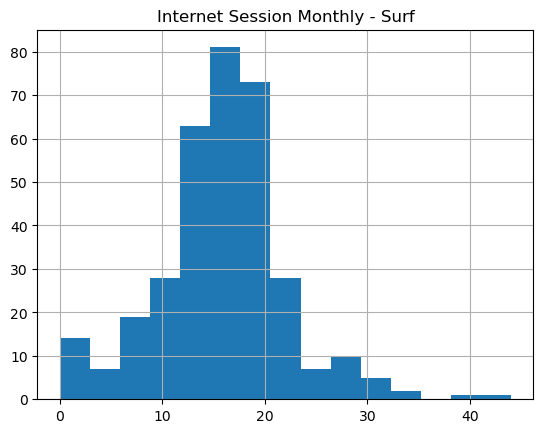

In [59]:
surf_part['gb_used_year_mean'].hist(bins=15)
plt.title('Internet Session Monthly - Surf')
plt.show()

Sebagian besar pengguna plan Surf memiliki puncak penggunaan pada kisaran 15GB per bulan pada umumnya di kisaran 10GB hingga 20GB. Di sini teridentifikasi outlier, di mana terdapat sekitar 2-3 orang menggunakan data 40GB per bulannya.
Antara rata-rata dan median tidak terlihat perbedaan yang signifikan sehingga dapat dikatakan histogram ini tidak memiliki kemiringan (skew). Lain halnya bila outlier dihapus maka kemungkinannya akan terjadi kemiringan ke kiri (negative skew)

#### Analisis Messages Made Monthly - Surf <a id='surf_messagespm'></a>

**Step 3.4** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Surf** berdasarkan data 'messages_made'.

Menyiapkan nilai varian.

In [60]:
np.var(surf_part['messages_made_year_mean'])

960.6794580624957

Menyiapkan nilai rata-rata dan standar deviasi.

In [61]:
surf_part['messages_made_year_mean'].describe()

count    339.000000
mean      31.955752
std       31.040646
min        0.000000
25%        5.000000
50%       26.000000
75%       49.500000
max      159.000000
Name: messages_made_year_mean, dtype: float64

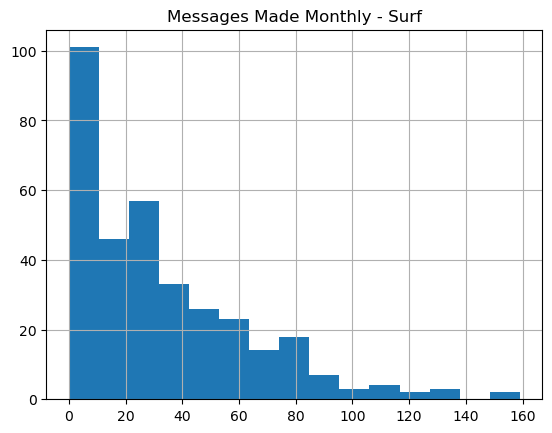

In [62]:
surf_part['messages_made_year_mean'].hist(bins=15)
plt.title('Messages Made Monthly - Surf')
plt.show()

Sebagian besar pengguna plan Surf hanya melakukan texting message pada kisaran 0 - 30 message saja tiap bulannya, dengan penggunaan tertinggi oleh pengguna plan Surf berada pada kisaran 10 message tiap bulannya. Terlihat bahwa semakin sedikit pengguna Surf yang melakukan texting messages untuk kebutuhan perpesanan, hanya menyisakan sekitar 2 - 4 orang saja yang intens menggunakan message. Dalam grafik juga teridentifikasi outlier di mana terdapat sekitar 2 - 3 orang menggunakan message di atas 150 message tiap bulannya. Secara umum histogram ini memiliki kemiringan ke kanan (positive skew)

### Proses analisis perilaku pengguna plan Ultimate <a id='analisis_ultimate'></a>

**Step 3.5** 
Melakukan proses analisis calls, messages, dan gb_data dari pengguna plan **Ultimate** secara bulanan.

In [63]:
ultimate_part = user_stats_year.query('plan == "ultimate"')
ultimate_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 497
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   user_id                  161 non-null    int64   
 1   first_name               161 non-null    object  
 2   last_name                161 non-null    object  
 3   city                     161 non-null    object  
 4   plan                     161 non-null    category
 5   calls_made_year_sum      161 non-null    float64 
 6   calls_made_year_mean     161 non-null    float64 
 7   duration_year_sum        161 non-null    float64 
 8   duration_year_mean       161 non-null    float64 
 9   gb_used_year_sum         161 non-null    float64 
 10  gb_used_year_mean        161 non-null    float64 
 11  messages_made_year_sum   161 non-null    float64 
 12  messages_made_year_mean  161 non-null    float64 
 13  profit_year_sum          161 non-null    float64 
 14  profit_year_mea

#### Analisis Calls Duration Monthly - Ultimate <a id='ultimate_minutespm'></a>

**Step 3.6** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Ultimate** berdasarkan data 'duration'.

Menyiapkan nilai varian.

In [64]:
np.var(ultimate_part['duration_year_mean'])

42652.56764785308

Menyiapkan nilai rata-rata dan standar deviasi.

In [65]:
ultimate_part['duration_year_mean'].describe()

count     161.000000
mean      399.217391
std       207.169366
min         0.000000
25%       261.000000
50%       414.000000
75%       512.000000
max      1055.000000
Name: duration_year_mean, dtype: float64

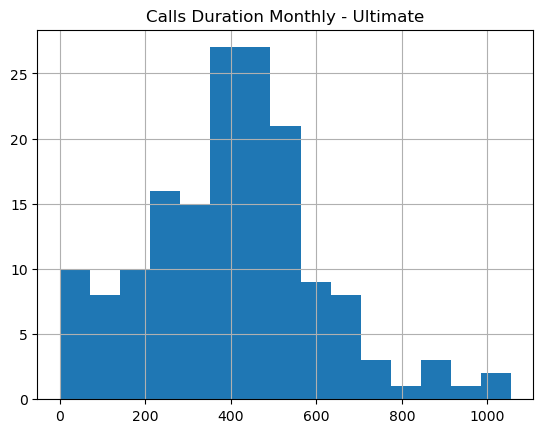

In [66]:
ultimate_part['duration_year_mean'].hist(bins=15)
plt.title('Calls Duration Monthly - Ultimate')
plt.show()

Sebagian besar pengguna plan Ultimate melakukan call antara 200 dan 550 per bulan, dengan puncaknya di kisaran 400.
Juga dapat terlihat potensi outlier di kisaran 750 ke atas, apabila outlier ini dihilangkan maka akan menghasilkan kemiringan ke kiri (negative skew).

#### Analisis Internet Session Monthly - Ultimate <a id='ultimate_gbdatapm'></a>

**Step 3.7** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Ultimate** berdasarkan data 'gb_used'.

Menyiapkan nilai varian.

In [67]:
np.var(ultimate_part['gb_used_year_mean'])

38.477142085567735

Menyiapkan nilai rata-rata dan standar deviasi.

In [68]:
ultimate_part['gb_used_year_mean'].describe()

count    161.000000
mean      15.788820
std        6.222349
min        0.000000
25%       12.000000
50%       16.000000
75%       19.000000
max       35.000000
Name: gb_used_year_mean, dtype: float64

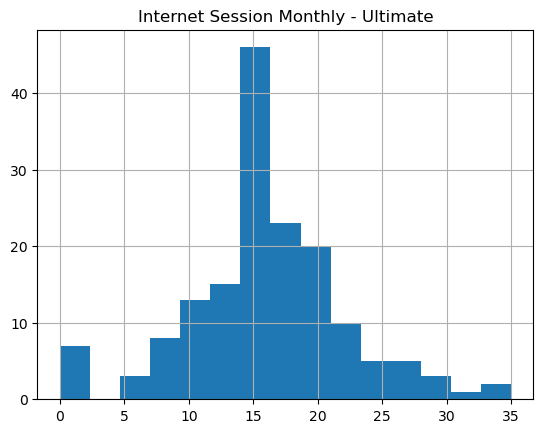

In [69]:
ultimate_part['gb_used_year_mean'].hist(bins=15)
plt.title('Internet Session Monthly - Ultimate')
plt.show()

Sebagian besar pengguna plan Ultimate memiliki puncak penggunaan pada kisaran 15GB per bulannya, dan secara umum penggunaan internet berada di kisaran 10GB hingga 20GB. Di sini juga teridentifikasi outlier di mana terdapat sekitar 8 orang menggunakan hanya 0 - 2 GB per bulannya, serta juga terdapat potensi outlier di mana sekitar 2 - 3 orang menggunakan internet hingga kisaran 35 GB.
Antara rata-rata dan median tidak terlihat perbedaan yang signifikan sehingga dapat dikatakan histogram ini tidak memiliki kemiringan (skew).

#### Analisis Messages Made Monthly - Ultimate <a id='ultimate_messagespm'></a>

**Step 3.8** 
Mencari nilai varian, rata-rata, standar deviasi, serta membuat histogram dari pengguna plan **Ultimate** berdasarkan data 'messages_made'.

Menyiapkan nilai varian.

In [70]:
np.var(ultimate_part['messages_made_year_mean'])

1082.9569075267166

Menyiapkan nilai rata-rata dan standar deviasi.

In [71]:
ultimate_part['messages_made_year_mean'].describe()

count    161.000000
mean      37.534161
std       33.010989
min        0.000000
25%        9.000000
50%       32.000000
75%       60.000000
max      148.000000
Name: messages_made_year_mean, dtype: float64

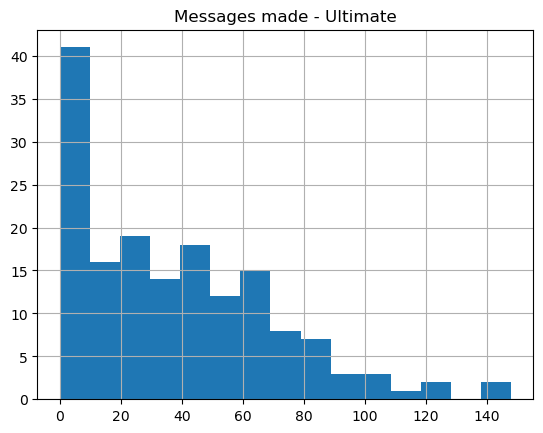

In [72]:
ultimate_part['messages_made_year_mean'].hist(bins=15)
plt.title('Messages made - Ultimate')
plt.show()

Seperti pada pengguna plan Surf, sebagian besar pengguna plan Ultimate juga hanya melakukan texting message pada kisaran 0 - 30 message saja tiap bulannya, dengan penggunaan tertinggi oleh pengguna plan Ultimate juga berada pada kisaran 10 message tiap bulannya. Juga terlihat bahwa semakin sedikit pengguna Ultimate yang melakukan texting messages untuk kebutuhan perpesanan, hanya menyisakan sekitar 2 - 3 orang saja yang intens menggunakan message. Dalam grafik juga teridentifikasi outlier di mana terdapat sekitar 2 - 3 orang menggunakan message di atas 130 message tiap bulannya. Secara umum histogram ini memiliki kemiringan ke kanan (positive skew)

### Kesimpulan <a id='analysis_conclusion'></a>

Analisis perilaku pengguna untuk kedua plan telah dilakukan, dengan hasil sebagai berikut:
* sebagian besar pengguna plan Surf melakukan call antara 200 dan 650 menit, dengan penggunaan data pada umumnya berkisar antara 10GB hingga 20GB, dan secara rata-rata mengirimkan 0 - 10 messages dalam sebulan.
* sebagian besar pengguna plan Ultimate melakukan call antara 200 dan 550 menit, dengan penggunaan data pada umumnya berkisar antara 10GB hingga 20GB, dan secara rata-rata mengirimkan 0 - 10 messages dalam sebulan.

[Kembali ke Daftar Isi](#back)

## Pengujian Hipotesis <a name='hypothesis_test'></a>

### Uji Hipotesis 1: "Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda" <a id='test_1'></a>

Melakukan pengujian hipotesis apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

Hipotesis ditetapkan sebagai berikut:

* H0: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama
* H1: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama

Pengujian dilakukan dengan menggunakan t-test Pengujian Hipotesis Persamaan Rata-Rata Dua Populasi, yakni dengan menggunakan use metode st.ttest_ind(). 

Fungsi penghitungan akan menghasilkan p-value yang akan dibandingkan dengan alpha yang ditetapkan sebesar 0.05 yang berfungsi sebagai threshold untuk dapat menyimpulkan apakah hipotesis nol diterima (p-value lebih kecil dari alpha) atau ditolak (p-value lebih besar dari alpha).

Sebelum melakukan pengujian, perlu dipastikan untuk nilai varian kedua data berbeda nilainya. Sebagai objek pengujian adalah kolom monthly_profit baik dari Surf maupun Ultimate yang telah tersedia dari proses sebelumnya.

**Step 4.1**
Menghitung varian untuk kedua data yang akan dilakukan pengujian

In [73]:
np.var(ultimate_part['profit_year_mean'])

19.226804521430356

In [74]:
np.var(surf_part['profit_year_mean'])

459.5064087503585

**Catatan**

Nilai varian kedua data cukup jauh perbedaannya yang artinya pengujian dapat dilanjutkan.

**Step 4.2**
Melakukan pengujian hipotesis dengan menggunakan metode st.ttest_ind() dengan nilai alpha 0.05

In [75]:
alpha = 0.05
results = st.ttest_ind(ultimate_part['profit_year_mean'], surf_part['profit_year_mean'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama')
else:
    print('Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama')

p-value: 2.389855634561327e-29
Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama


**Hasil**

Nilai p-value jauh lebih kecil daripada alpha yang artinya hipotesis nol tidak dapat ditolak atau hipotesis nol diterima yakni bahwa Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama. 

### Uji Hipotesis 2: "Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain" <a id='test_2'></a>

Melakukan pengujian hipotesis apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Hipotesis ditetapkan sebagai berikut:

* H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain tidak sama
* H1: Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain sama

Pengujian dilakukan dengan menggunakan t-test Pengujian Hipotesis Persamaan Rata-Rata Dua Populasi, yakni dengan menggunakan use metode st.ttest_ind(). 

Fungsi penghitungan akan menghasilkan p-value yang akan dibandingkan dengan alpha yang ditetapkan sebesar 0.05 yang berfungsi sebagai threshold untuk dapat menyimpulkan apakah hipotesis nol diterima (p-value lebih kecil dari alpha) atau ditolak (p-value lebih besar dari alpha).

Sebelum melakukan pengujian, perlu dipastikan untuk nilai varian kedua data berbeda nilainya. Sebagai objek pengujian adalah kolom monthly_profit yang memerlukan proses pemilahan terlebih dahulu.

Jadi perlu dibuat terlebih dahulu tabel tersendiri dari user_stats di mana kolom 'region' = ny-nj dan kolom 'region' = other.

**Step 4.3**
Membuat tabel tersendiri dari user_stats di mana kolom 'region' = "ny-nj" dan kolom 'region' = "other"

In [76]:
nynj_part = user_stats_year.query('region == "ny-nj"')
nynj_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 14 to 498
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   user_id                  80 non-null     int64   
 1   first_name               80 non-null     object  
 2   last_name                80 non-null     object  
 3   city                     80 non-null     object  
 4   plan                     80 non-null     category
 5   calls_made_year_sum      80 non-null     float64 
 6   calls_made_year_mean     80 non-null     float64 
 7   duration_year_sum        80 non-null     float64 
 8   duration_year_mean       80 non-null     float64 
 9   gb_used_year_sum         80 non-null     float64 
 10  gb_used_year_mean        80 non-null     float64 
 11  messages_made_year_sum   80 non-null     float64 
 12  messages_made_year_mean  80 non-null     float64 
 13  profit_year_sum          80 non-null     float64 
 14  profit_year_mea

In [77]:
other_part = user_stats_year.query('region == "other"')
other_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   user_id                  420 non-null    int64   
 1   first_name               420 non-null    object  
 2   last_name                420 non-null    object  
 3   city                     420 non-null    object  
 4   plan                     420 non-null    category
 5   calls_made_year_sum      420 non-null    float64 
 6   calls_made_year_mean     420 non-null    float64 
 7   duration_year_sum        420 non-null    float64 
 8   duration_year_mean       420 non-null    float64 
 9   gb_used_year_sum         420 non-null    float64 
 10  gb_used_year_mean        420 non-null    float64 
 11  messages_made_year_sum   420 non-null    float64 
 12  messages_made_year_mean  420 non-null    float64 
 13  profit_year_sum          420 non-null    float64 
 14  profit_year_mea

**Step 4.4**
Menghitung varian untuk kedua data yang akan dilakukan pengujian

In [78]:
np.var(nynj_part['profit_year_mean'])

284.16859375000007

In [79]:
np.var(other_part['profit_year_mean'])

381.1928061224475

**Catatan**

Nilai varian kedua data berbeda yang artinya pengujian dapat dilanjutkan.

In [80]:
alpha = 0.05
results = st.ttest_ind(nynj_part['profit_year_mean'], other_part['profit_year_mean'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain tidak sama')
else:
    print('Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain sama')

p-value: 0.46517357376401225
Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain sama


**Hasil**

Nilai p-value lebih besar daripada alpha yang artinya hipotesis nol ditolak yang berarti Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain.

## Temuan <a name='end'></a>

Dari analisis calls duration monthly, internet session monthly, dan message made monthly dari pengguna untuk kedua plan, Surf dan Ultimate, ditemukan bahwa:
* Sebagian besar pengguna plan Surf melakukan call antara 200 dan 650 menit, dengan penggunaan data pada umumnya berkisar antara 30GB hingga 50GB, dan secara rata-rata mengirimkan 0 - 10 messages dalam sebulan.
* Sebagian besar pengguna plan Ultimate melakukan call antara 200 dan 550 menit, dengan penggunaan data pada umumnya berkisar antara 30GB hingga 50GB, dan secara rata-rata mengirimkan 0 - 10 messages dalam sebulan.

Dari pengujian hipotesis t-test ditemukan bahwa:
* Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda (hipotesis nol diterima)
* Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain (hipotesis nol ditolak)

[Kembali ke Daftar Isi](#back)